<center>MACHINE LEARNING AVEC R

>Chargement des librairies nécessaires

In [1]:
if (require("parallel")==FALSE) install.packages("parallel")## Parallélisation : travailler sur tous les coeurs de votre PC
if (require("doSNOW")==FALSE) install.packages("doSNOW")
if (require("caret")==FALSE) install.packages("caret")
if (require("C50")==FALSE) install.packages("C50")
if (require("ade4")==FALSE) install.packages("ade4")
if (require("ggplot2")==FALSE) install.packages("ggplot2")
if (require("glmnet")==FALSE) install.packages("glmnet")
if (require("pROC")==FALSE) install.packages("pROC")
if (require("ROCR")==FALSE) install.packages("ROCR")
if (require("rpart")==FALSE) install.packages("rpart")
if (require("rpart.plot")==FALSE) install.packages("rpart.plot")
if (require("nnet")==FALSE) install.packages("nnet")

Loading required package: parallel

Loading required package: doSNOW

Warning message:
"package 'doSNOW' was built under R version 3.5.3"
Loading required package: foreach

Loading required package: iterators

Loading required package: snow


Attaching package: 'snow'


The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, clusterSplit, makeCluster, parApply,
    parCapply, parLapply, parRapply, parSapply, splitIndices,
    stopCluster


Loading required package: caret

Warning message:
"package 'caret' was built under R version 3.5.3"
Loading required package: lattice

Warning message:
"package 'lattice' was built under R version 3.5.3"
Loading required package: ggplot2

Loading required package: C50

Warning message:
"package 'C50' was built under R version 3.5.3"
Loading required package: ade4

Warning message:
"package 'ade4' was built under R version 3.5.3"
Loading required package: gl

In [2]:
library(parallel)
library(doSNOW)
library(caret)
library(C50)
library(ade4)
library(ggplot2)
library(glmnet)
library(pROC)
library(ROCR)
library(rpart)
library(rpart.plot)
library(nnet)

>Parallélisation des traitements

### Pour réduire les temps de traitements longs, il existe plusieurs solutions quand on utilise R. Nous utiliserons un moyen simple d'augmenter significativement la vitesse des calculs en parallélisant les traitements sur plusieurs coeurs (si la machine en possède) et quand les tâches qui doivent être exécutées sont indépendentes les unes des autres.  Nous utiliserons si besoin la librairie "parallel".
### Pour plus de détail : https://stat.ethz.ch/R-manual/R-patched/library/parallel/doc/parallel.pdf

In [ ]:
detectCores() # détecter le nombre de coeurs du PC
detectCores(logical = FALSE) # détecter le nombre de coeurs logiques du PC
cl <- makeCluster(4)
registerDoSNOW(cl) # Parallélisation

>Cas pratiques sur des jeux de données (utilisation des algorithmes de ML)

>><font color='green'>Chargement des données à utiliser</font>

In [3]:
credit <- read.csv("D:/Programmation/Mes cours/SIMPLON/Différentes prez Formateur/Promo IA Nancy/R/Data/credit.csv", sep = ',', header=TRUE)
credit1 <- read.csv("D:/Programmation/Mes cours/SIMPLON/Différentes prez Formateur/Promo IA Nancy/R/Data/credit3.csv", sep = ',', header=TRUE)
credit <-credit[,-1]
credit1 <-credit1[,-1]
credit

Comptes,Duree_credit,Historique_credit,Objet_credit,Montant_credit,Epargne,Anciennete_emploi,Taux_effort,Situation_familiale,Garanties,...,Biens,Age,Autres_credits,Statut_domicile,Nb_credits,Type_emploi,Nb_pers_charge,Telephone,Cible,Cle
<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>,...,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<int>
1,6,A34,A43,1169,0,5,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,0,1
2,48,A32,A43,5951,1,3,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,1,2
4,12,A34,A46,2096,1,4,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,0,3
1,42,A32,A42,7882,1,4,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,0,4
1,24,A33,A40,4870,1,3,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,1,5
4,36,A32,A46,9055,0,3,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,0,6
4,24,A32,A42,2835,3,5,3,A93,A101,...,A122,53,A143,A152,1,A173,1,A191,0,7
2,36,A32,A41,6948,1,3,2,A93,A101,...,A123,35,A143,A151,1,A174,1,A192,0,8
4,12,A32,A43,3059,4,4,2,A91,A101,...,A121,61,A143,A152,1,A172,1,A191,0,9


In [4]:
# Création du train et test set
set.seed(2)
p <- createDataPartition(y=credit$Cible, p=70/100, list=FALSE)
train <- credit[p,]
test <- credit[-p,]

# Création du train et test set
set.seed(2)
p <- createDataPartition(y=credit1$Cible, p=70/100, list=FALSE)
train_ <- credit1[p,]
test_ <- credit1[-p,]

>><font color='green'>Régression linéaire</font>

In [5]:
lm <- lm(Cible~., data=train)
summary(lm)


Call:
lm(formula = Cible ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.90904 -0.27713 -0.09319  0.31193  0.98581 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             6.590e-01  1.994e-01   3.304 0.001003 ** 
Comptes                -8.678e-02  1.299e-02  -6.682 5.01e-11 ***
Duree_credit            5.904e-03  1.729e-03   3.415 0.000677 ***
Historique_creditA31   -2.056e-02  1.104e-01  -0.186 0.852314    
Historique_creditA32   -1.777e-01  8.716e-02  -2.038 0.041905 *  
Historique_creditA33   -2.943e-01  9.521e-02  -3.091 0.002080 ** 
Historique_creditA34   -3.156e-01  8.766e-02  -3.600 0.000342 ***
Objet_creditA41        -2.497e-01  6.145e-02  -4.063 5.42e-05 ***
Objet_creditA410       -2.549e-01  1.590e-01  -1.604 0.109301    
Objet_creditA42        -1.134e-01  4.966e-02  -2.283 0.022755 *  
Objet_creditA43        -9.334e-02  4.453e-02  -2.096 0.036455 *  
Objet_creditA44        -1.143e-01  1.488e-01

In [ ]:
# Cross validation : k-fold cv
fitControl <- trainControl(method = "repeatedcv", repeats = 10, number = 4)
# Entrainement du modèle
m <- train(make.names(type)~., data = train, method = "lm", trControl = fitControl)
m
# Prédiction
pred <- predict(m, newdata = test)

>><font color='green'>Régression logistique</font>

### 1er modèle

In [6]:
logit <- glm(Cible~.,data=train,family=binomial(link = "logit"))
summary(logit)
logit$coefficients


Call:
glm(formula = Cible ~ ., family = binomial(link = "logit"), data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3260  -0.6934  -0.3996   0.7243   2.4892  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)             8.764e-01  1.224e+00   0.716 0.473888    
Comptes                -5.352e-01  8.531e-02  -6.274 3.53e-10 ***
Duree_credit            3.431e-02  1.056e-02   3.249 0.001159 ** 
Historique_creditA31   -3.633e-02  6.541e-01  -0.056 0.955701    
Historique_creditA32   -7.619e-01  5.199e-01  -1.466 0.142756    
Historique_creditA33   -1.482e+00  5.762e-01  -2.573 0.010089 *  
Historique_creditA34   -1.709e+00  5.308e-01  -3.220 0.001281 ** 
Objet_creditA41        -1.721e+00  4.573e-01  -3.763 0.000168 ***
Objet_creditA410       -1.518e+00  9.989e-01  -1.520 0.128545    
Objet_creditA42        -7.425e-01  3.107e-01  -2.390 0.016843 *  
Objet_creditA43        -5.922e-01  2.848e-01  -2.079 0.037588 * 

(Intercept)                Comptes           Duree_credit 
           0.876369753           -0.535222832            0.034306182 
  Historique_creditA31   Historique_creditA32   Historique_creditA33 
          -0.036332215           -0.761949192           -1.482486288 
  Historique_creditA34        Objet_creditA41       Objet_creditA410 
          -1.709187655           -1.720541333           -1.518155642 
       Objet_creditA42        Objet_creditA43        Objet_creditA44 
          -0.742511905           -0.592213884           -1.044459066 
       Objet_creditA45        Objet_creditA46        Objet_creditA48 
          -0.221015087            0.040808642           -1.468158896 
       Objet_creditA49         Montant_credit                Epargne 
          -0.598913862            0.000132676            0.009308920 
     Anciennete_emploi            Taux_effort Situation_familialeA92 
          -0.159722461            0.371529466           -0.533615344 
Situation_familialeA93 Situation_familialeA94          GarantiesA102 
          -1.172065356           -1.118450520            0.892578730 
         GarantiesA103    Anciennete_domicile              BiensA122 
          -1.196414445            0.003420865            0.285620865 
             BiensA123              BiensA124                    Age 
           0.149278755            0.484767182           -0.021721516 
    Autres_creditsA142     Autres_creditsA143    Statut_domicileA152 
          -0.410637446           -0.610957234           -0.310688191 
   Statut_domicileA153             Nb_credits        Type_emploiA172 
          -0.129006062            0.519499044            0.619031717 
       Type_emploiA173        Type_emploiA174         Nb_pers_charge 
           0.476703374            0.788409386            0.471249243 
         TelephoneA192                    Cle 
          -0.399118933           -0.000405487

In [7]:
# recherche maximale
selection <- step(logit, direction="backward",trace=TRUE, k = log(nrow(train)))

Start:  AIC=907.8
Cible ~ Comptes + Duree_credit + Historique_credit + Objet_credit + 
    Montant_credit + Epargne + Anciennete_emploi + Taux_effort + 
    Situation_familiale + Garanties + Anciennete_domicile + Biens + 
    Age + Autres_credits + Statut_domicile + Nb_credits + Type_emploi + 
    Nb_pers_charge + Telephone + Cle

                      Df Deviance    AIC
- Objet_credit         9   661.58 871.22
- Biens                3   640.71 889.66
- Type_emploi          3   641.01 889.95
- Statut_domicile      2   640.47 895.96
- Situation_familiale  3   650.51 899.46
- Autres_credits       2   644.05 899.54
- Anciennete_domicile  1   639.21 901.25
- Epargne              1   639.21 901.25
- Cle                  1   640.51 902.56
- Historique_credit    4   660.57 902.96
- Nb_pers_charge       1   641.74 903.79
- Telephone            1   641.92 903.97
- Anciennete_emploi    1   642.02 904.06
- Garanties            2   648.94 904.43
- Age                  1   643.33 905.38
- Nb_credit

#### 2ème modèle

In [8]:
# Reprise de la régression logistique et interprétation des résultats
logit <- glm(Cible ~ Comptes + Duree_credit + Anciennete_emploi + Taux_effort, data=train,family=binomial(link = "logit"))
summary(logit)
logit$coefficients
OR = as.data.frame(exp(logit$coefficients))
OR["%"] <- (exp(logit$coefficients) -1)*100
OR


Call:
glm(formula = Cible ~ Comptes + Duree_credit + Anciennete_emploi + 
    Taux_effort, family = binomial(link = "logit"), data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9182  -0.8126  -0.5220   0.9538   2.3256  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -0.25130    0.40000  -0.628  0.52984    
Comptes           -0.60879    0.07677  -7.930 2.18e-15 ***
Duree_credit       0.04482    0.00742   6.041 1.54e-09 ***
Anciennete_emploi -0.23943    0.07647  -3.131  0.00174 ** 
Taux_effort        0.22089    0.08363   2.641  0.00826 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 861.88  on 699  degrees of freedom
Residual deviance: 732.09  on 695  degrees of freedom
AIC: 742.09

Number of Fisher Scoring iterations: 4


(Intercept)           Comptes      Duree_credit Anciennete_emploi 
      -0.25129947       -0.60879344        0.04482334       -0.23942938 
      Taux_effort 
       0.22089346

,exp(logit$coefficients),%
,<dbl>,<dbl>
(Intercept),0.7777894,-22.221058
Comptes,0.5440068,-45.599315
Duree_credit,1.0458431,4.584308
Anciennete_emploi,0.7870769,-21.292315
Taux_effort,1.2471905,24.719054


[1] 0.7624429

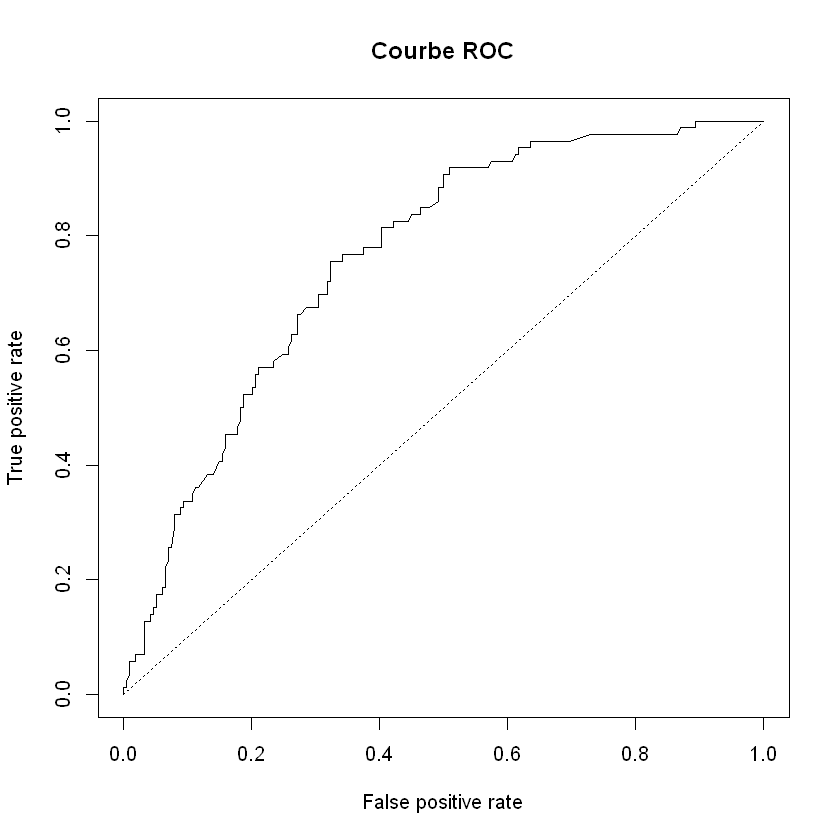

In [9]:
# aire sous la courbe ROC
library(ROCR)
pred_test <- predict(logit, newdata=test, type="response")
predTest <- prediction(pred_test,test$Cible,label.ordering=c(0,1))
performance(predTest,"auc")@y.values[[1]]

# courbe ROC
perf <- performance(predTest,"tpr","fpr")
plot(perf,main='Courbe ROC')
segments(0,0,1,1,lty=3) # ajout diagonale en pointillés 

In [13]:
# Cross validation : k-fold cv
fitControl <- trainControl(method = "repeatedcv", repeats = 10, classProbs = TRUE, summaryFunction = twoClassSummary)
# Entrainement du modèle
m <- train(make.names(Cible)~., data = train, method = "glm", trControl = fitControl, metric = "ROC")
# Courbe des AUC
ggplot(m)
# Prédiction
pred <- predict(m, newdata = test)
# Récupération des probabilités
mProbs <- predict(m, newdata = test, type = "prob")
# Matrice de confusion
confusionMatrix(data = pred, test$Cible)

In [ ]:
# courbe ROC
pred.m <- as.vector(mProbs)[,"red"]
roc.m <- pROC::roc(test$type, pred.m)
auc <- pROC::auc(roc.m)
plot(roc.m)

>><font color='green'>Arbres de décision</font>

#### tree

In [21]:
library(tree)
#arbre <- tree(Cible ~ Age+Duree_credit,data=credit)
arbre <- tree(Cible ~.,data=train)
arbre

node), split, n, deviance, yval
      * denotes terminal node

  1) root 700 148.6000 0.3057  
    2) Comptes < 2.5 380  93.3600 0.4342  
      4) Duree_credit < 25.5 278  63.7400 0.3561  
        8) Historique_credit: A32,A33,A34 249  53.9400 0.3173  
         16) Montant_credit < 9899.5 243  51.0700 0.3004  
           32) Montant_credit < 1381.5 85  21.0100 0.4471  
             64) Biens: A121,A122 62  13.1800 0.3065  
              128) Montant_credit < 1206.5 43   6.5120 0.1860  
                256) Epargne < 1.5 37   3.5680 0.1081 *
                257) Epargne > 1.5 6   1.3330 0.6667 *
              129) Montant_credit > 1206.5 19   4.6320 0.5789  
                258) Montant_credit < 1281 6   0.0000 1.0000 *
                259) Montant_credit > 1281 13   3.0770 0.3846 *
             65) Biens: A123,A124 23   3.3040 0.8261 *
           33) Montant_credit > 1381.5 158  27.2500 0.2215 *
         17) Montant_credit > 9899.5 6   0.0000 1.0000 *
        9) Historique_credit: A30,

#### rpart

In [22]:
set.seed(235)
cart <- rpart(Cible ~ . ,data = train, method="class",parms=list(split="gini"),cp=0)
cart # commande équivalente à "print(cart)"
summary(cart,digits=3) # plus d'informations sur les scissions

n= 700 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

   1) root 700 214 0 (0.69428571 0.30571429)  
     2) Comptes>=2.5 320  49 0 (0.84687500 0.15312500)  
       4) Autres_credits=A142,A143 278  33 0 (0.88129496 0.11870504)  
         8) Objet_credit=A41,A43,A44,A48 129   7 0 (0.94573643 0.05426357) *
         9) Objet_credit=A40,A42,A45,A46,A49 149  26 0 (0.82550336 0.17449664)  
          18) Montant_credit< 6687.5 138  20 0 (0.85507246 0.14492754) *
          19) Montant_credit>=6687.5 11   5 1 (0.45454545 0.54545455) *
       5) Autres_credits=A141 42  16 0 (0.61904762 0.38095238)  
        10) Objet_credit=A410,A42,A43,A46 22   3 0 (0.86363636 0.13636364) *
        11) Objet_credit=A40,A41,A49 20   7 1 (0.35000000 0.65000000) *
     3) Comptes< 2.5 380 165 0 (0.56578947 0.43421053)  
       6) Duree_credit< 25.5 278  99 0 (0.64388489 0.35611511)  
        12) Historique_credit=A32,A33,A34 249  79 0 (0.68273092 0.31726908)  
          24) Montant_credit< 7

Call:
rpart(formula = Cible ~ ., data = train, method = "class", parms = list(split = "gini"), 
    cp = 0)
  n= 700 

       CP nsplit rel error xerror   xstd
1 0.07009      0     1.000  1.000 0.0570
2 0.05140      2     0.860  0.963 0.0563
3 0.03271      3     0.808  0.902 0.0552
4 0.01402      6     0.710  0.879 0.0548
5 0.00467     13     0.593  0.855 0.0543
6 0.00234     19     0.556  0.907 0.0553
7 0.00000     21     0.551  0.935 0.0559

Variable importance
            Comptes      Montant_credit        Duree_credit               Biens 
                 17                  17                  10                  10 
       Objet_credit   Historique_credit                 Age                 Cle 
                  9                   8                   6                   5 
     Autres_credits          Nb_credits Situation_familiale     Statut_domicile 
                  5                   3                   3                   2 
  Anciennete_emploi             Epargne       

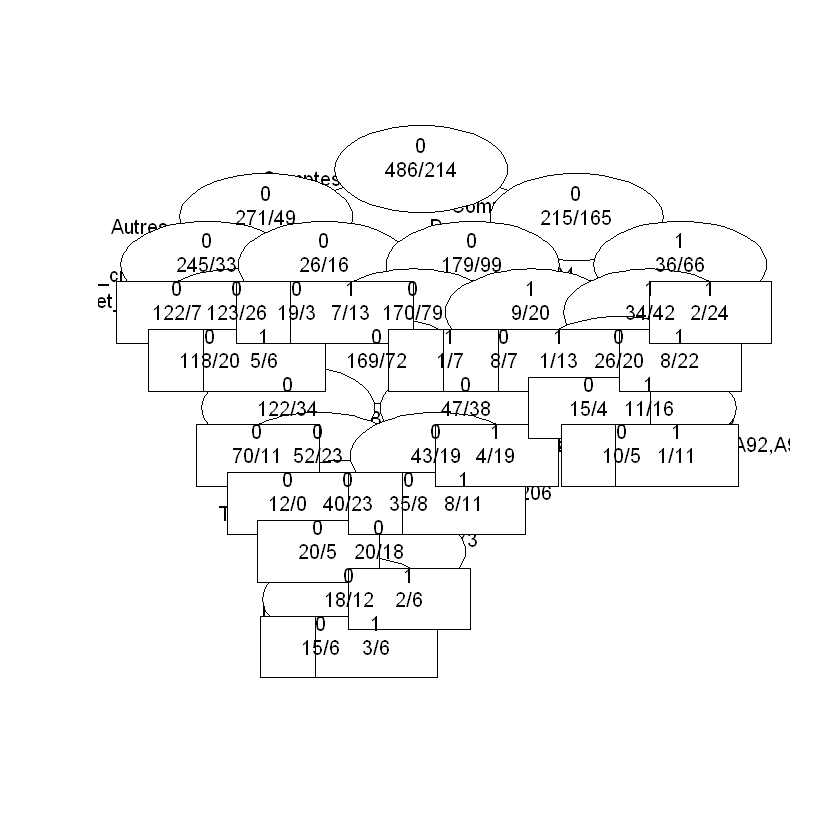

In [23]:
# affichage graphique de l'arbre
plot(cart,branch=.2, uniform=T, compress=T, margin=.1)
text(cart, fancy=T,use.n=T,pretty=0,all=T, cex=1)

In [24]:
# élagage automatique au minimum d'erreur + 1 écart-type
xerr <- cart$cptable[,"xerror"]
# xerr
minxerr <- which.min(xerr)
seuilerr <- cart$cptable[minxerr, "xerror"]+cart$cptable[minxerr, "xstd"]
xerr [xerr < seuilerr][1]
mincp <- cart$cptable[names(xerr [xerr < seuilerr][1]), "CP"]

3 
0.9018692

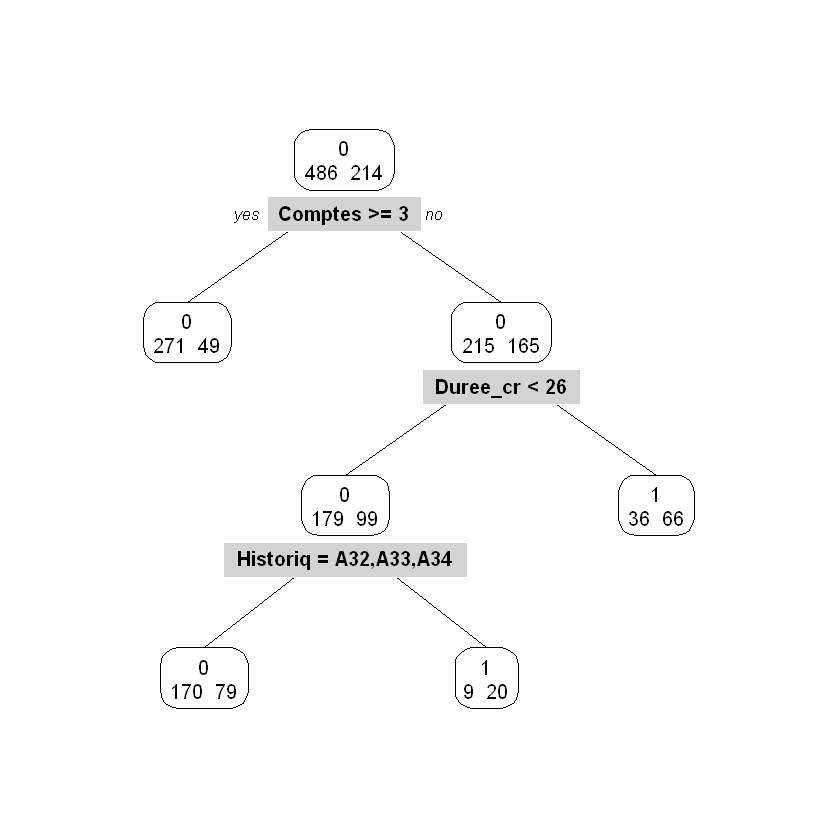

In [25]:
# utilisation de la fonction "prune" pour l'élagage
prunedcart <- prune(cart,cp=mincp)
prp(prunedcart,type=2,extra=1,split.box.col="lightgray")

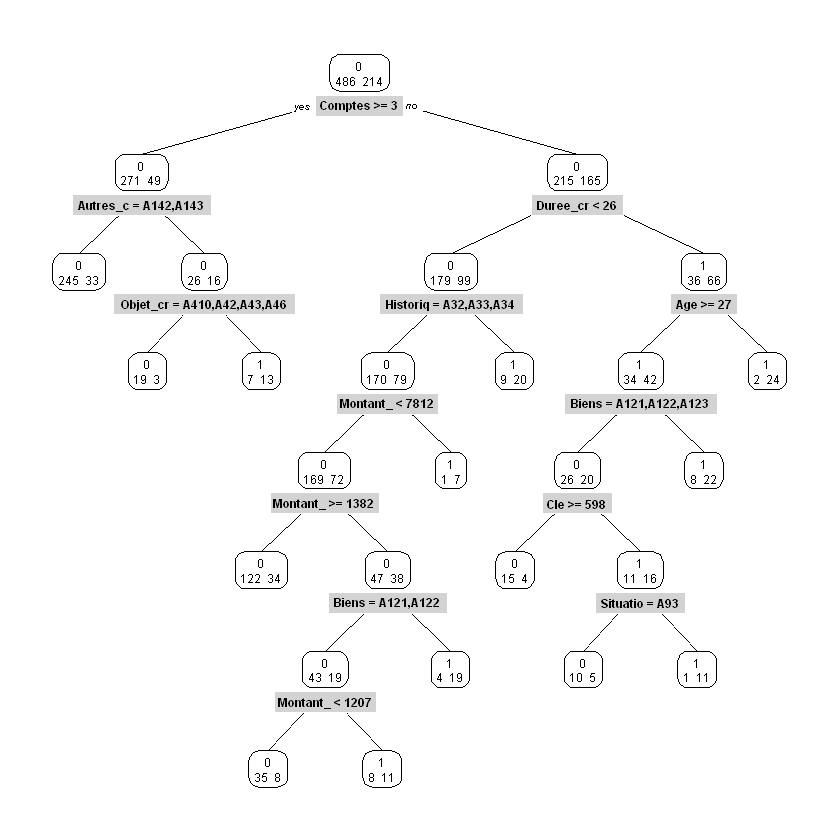

In [26]:
# élaguage automatique au minimum d'erreur
xerr <- cart$cptable[,"xerror"]
minxerr <- which.min(xerr)
mincp <- cart$cptable[minxerr, "CP"]
prunedcart1 <- prune(cart,cp=mincp)
prp(prunedcart1,type=2,extra=1,split.box.col="lightgray")

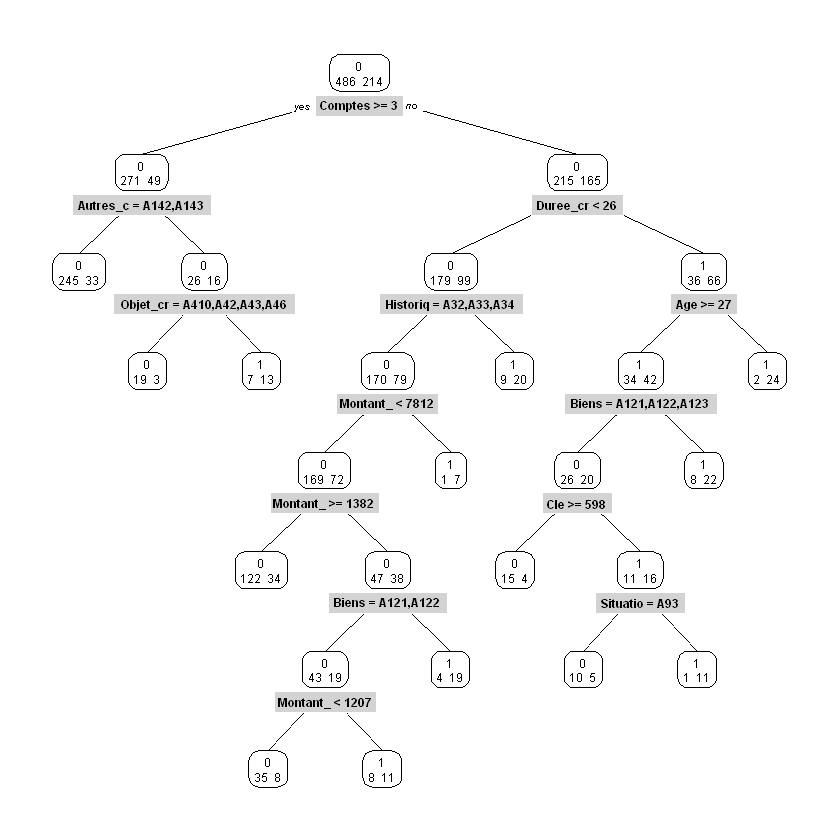

In [27]:
# code plus compact :
prunedcart1 <- prune(cart, cp=cart$cptable[which.min(cart$cptable[,"xerror"]),"CP"])
prp(prunedcart1,type=2,extra=1,split.box.col="lightgray")

##### Validation

In [29]:
#Prédiction du modèle sur les données de test
pred <- predict(prunedcart1,newdata=test, type="class")
#Matrice de confusion
mc<-table(test$Cible,pred)
mc

   pred
      0   1
  0 181  33
  1  50  36

In [30]:
#Erreur de classement
erreur.classement<-1.0-(mc[1,1]+mc[2,2])/sum(mc)
print(erreur.classement)

[1] 0.2766667


In [31]:
#Taux de prédiction
prediction=mc[2,2]/sum(mc[2,])
print(prediction)

[1] 0.4186047


[1] 0.7460606

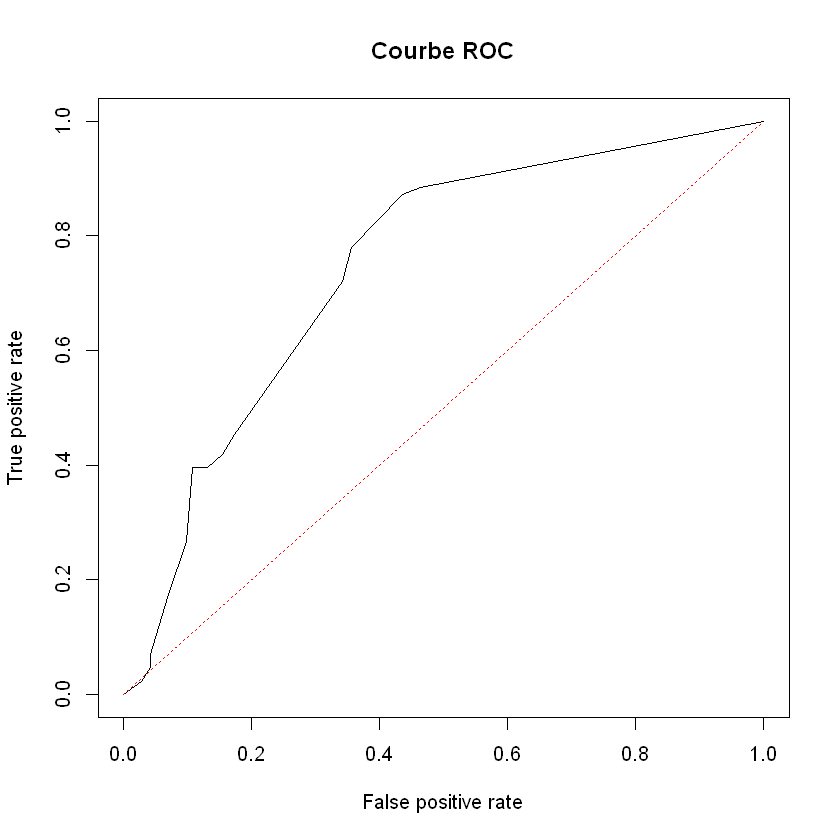

In [37]:
# Aire sous la courbe ROC
library(ROCR)
predCART <- predict(prunedcart1,type="prob",test)
pred <- prediction(predCART[,2],test$Cible,label.ordering=c(0,1))
auc <- performance(pred,"auc")
performance(pred,"auc")@y.values[[1]]

# récupère l'attribut "y.values" de l'objet "performance"
perf <- performance(pred,"tpr","fpr")
plot(perf,main='Courbe ROC')
segments(0,0,1,1,col='red',lty=3) # ajout diagonale en pointillés rouge

#### C5.0

In [ ]:
# Cross validation : k-fold cv
fitControl <- trainControl(method = "repeatedcv", repeats = 10, classProbs = TRUE, summaryFunction = twoClassSummary)
# Entrainement du modèle
m <- train(make.names(Cible)~., data = train, method = "C50", trControl = fitControl, metric = "ROC")
# Courbe des AUC
ggplot(m)
# Prédiction
pred <- predict(m, newdata = test)
# Récupération des probabilités
mProbs <- predict(m, newdata = test, type = "prob")
# Matrice de confusion
confusionMatrix(data = pred, test$Cible)

In [ ]:
pred.m <- as.vector(mProbs)[,"red"]
roc.m <- pROC::roc(test$Cible, pred.m)
auc <- pROC::auc(roc.m)
plot(roc.m)

#### rpart

In [ ]:
# Cross validation : k-fold cv
fitControl <- trainControl(method = "repeatedcv", repeats = 10, classProbs = TRUE, summaryFunction = twoClassSummary)
# Entrainement du modèle
m <- train(make.names(Cible)~., data = train, method = "rpart", trControl = fitControl, metric = "ROC")
# Courbe des AUC
ggplot(m)
# Prédiction
pred <- predict(m, newdata = test)
# Récupération des probabilités
mProbs <- predict(m, newdata = test, type = "prob")
# Matrice de confusion
confusionMatrix(data = pred, test$Cible)

In [ ]:
pred.m <- as.vector(mProbs)[,"red"]
roc.m <- pROC::roc(test$Cible, pred.m)
auc <- pROC::auc(roc.m)
plot(roc.m)

#### ctree

In [ ]:
# Cross validation : k-fold cv
fitControl <- trainControl(method = "repeatedcv", repeats = 10, classProbs = TRUE, summaryFunction = twoClassSummary)
# Entrainement du modèle
m <- train(make.names(Cible)~., data = train, method = "ctree", trControl = fitControl, metric = "ROC")
# Courbe des AUC
ggplot(m)
# Prédiction
pred <- predict(m, newdata = test)
# Récupération des probabilités
mProbs <- predict(m, newdata = test, type = "prob")
# Matrice de confusion
confusionMatrix(data = pred, test$Cible)

In [ ]:
pred.m <- as.vector(mProbs)[,"red"]
roc.m <- pROC::roc(test$Cible, pred.m)
auc <- pROC::auc(roc.m)
plot(roc.m)